# Histogram

The below section covers histogram and how to chart it


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


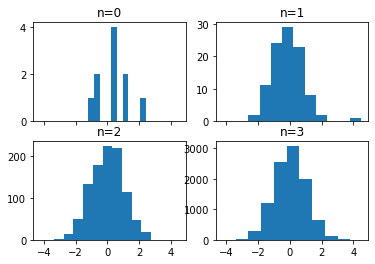

In [35]:
#An example of how bin size makes a difference
#here is a normal distribution using bin size of 10

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex= True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title(f'n={n}')
    
    

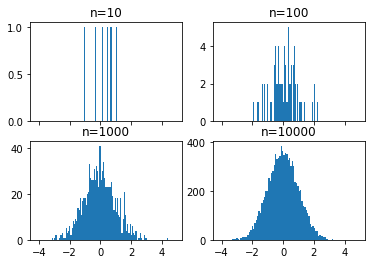

In [36]:
#The same data represented using a larger bin size renders totally differently

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)

axs = [ax1, ax2, ax3, ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale = 1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title(f'n={sample_size}')
    

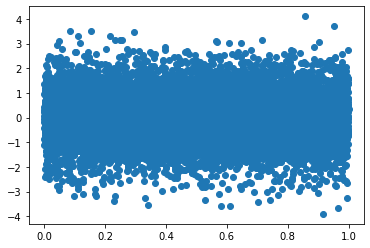

In [6]:
plt.figure()

Y = np.random.normal(loc=0.0, scale = 1.0, size = 10000)
X = np.random.random(size=10000)
plt.scatter(X, Y)


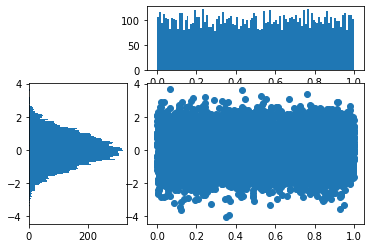

In [17]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])


y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
x = np.random.random(size = 10000)
lower_right.scatter(x, y)
top_histogram.hist(x, bins = 100)
s = side_histogram.hist(y, bins=100, orientation = 'horizontal')


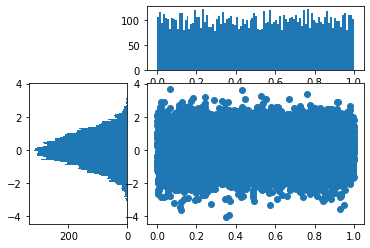

In [37]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
lower_right.scatter(x, y)

top_histogram.hist(x, bins=100)
side_histogram.hist(y, bins=100, orientation='horizontal')
side_histogram.invert_xaxis()


# Box and Whisker Plot
The following sections cover box plots

In [38]:
import pandas as pd
normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({
    'normal': normal_sample,
    'random': random_sample,
    'gamma': gamma_sample
})



In [39]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.008725,0.505278,2.019113
std,1.008053,0.287769,1.431653
min,-3.880554,0.000059,0.005513
25%,-0.680586,0.260204,0.972300
50%,-0.016561,0.504161,1.690218
75%,0.671257,0.756075,2.737669
max,3.797752,0.999945,12.397312


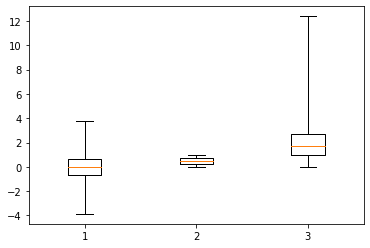

In [40]:
plt.figure()

_ = plt.boxplot([df['normal'], df['random'], df['gamma']], whis= (0, 100) )

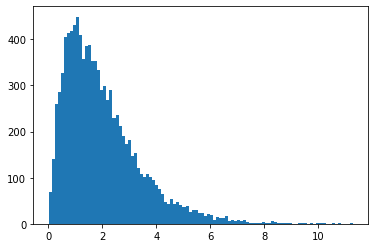

In [30]:
_ = plt.hist(df['gamma'], bins=100)

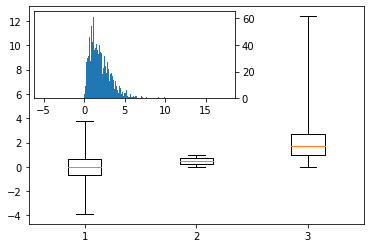

In [41]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()

plt.boxplot([df['normal'], df['random'], df['gamma']], whis=(0, 100,))
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=1000)
ax2.yaxis.tick_right()
ax2.margins(x=0.5)

# Heatmaps

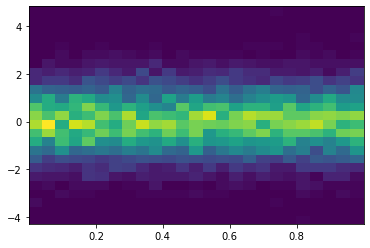

In [42]:
plt.figure()
x = np.random.random(size = 10000)
y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)

_ =plt.hist2d(x, y, bins=25)

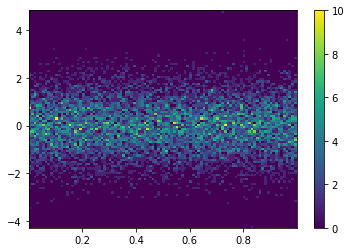

In [48]:
plt.figure()
_ = plt.hist2d(x, y, bins=100)
plt.colorbar() #this draws a legend next to the color

# Animations


In [49]:
import matplotlib.animation as animation
n = 100
x = np.random.randn(n)


In [58]:
%matplotlib notebook

In [64]:
def update(curr):
    if curr == n:
        a.event_source.stop()
        plt.cla()
        bins = np.arange(-4, 4, 0.5)
        plt.axis([-4, 4, 0, 30])
        plt.gca().set_title('Sampling the normal distribution')
        plt.gca().set_ylabel('Frequency')
        plt.gca().set_xlabel('Value')
        plt.annotate(f'n = {curr}', [3, 27])
        



<IPython.core.display.Javascript object>


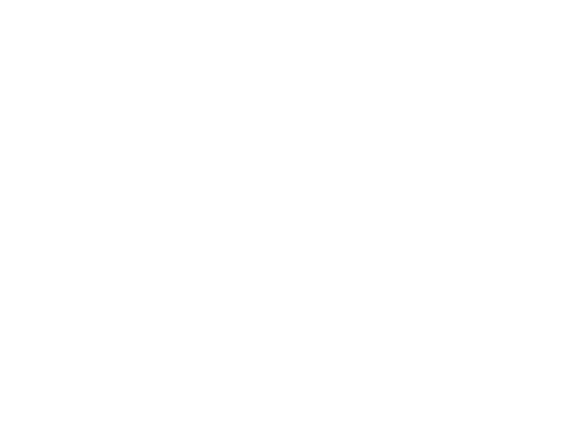

In [66]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100)
#This doesnt work on the version of numpy/conda i have


# Event Handling

<IPython.core.display.Javascript object>


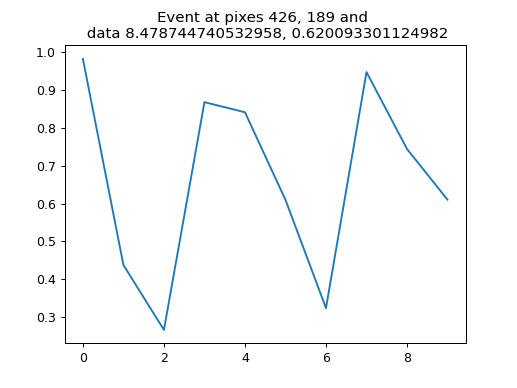

9

In [68]:
plt.figure()
data = np.random.rand(10)

plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixes {}, {} and {} data {}, {}'.format(event.x, event.y,
                                                                      '\n',
                                                                      event.xdata,
                                                                      event.ydata))
    

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [69]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada',
           'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({
    'height': np.random.rand(10),
    'weight': np.random.rand(10),
    'origin' : origins
})
df

,height,weight,origin
0,0.425026,0.997461,China
1,0.696951,0.485822,Germany
2,0.026282,0.792713,Canada
3,0.044560,0.773959,Mexico
4,0.806435,0.188724,Brazil
5,0.035894,0.442714,India
6,0.704913,0.902978,Chile
7,0.555031,0.536200,UK
8,0.188282,0.514790,USA
9,0.939054,0.743916,Iraq


<IPython.core.display.Javascript object>


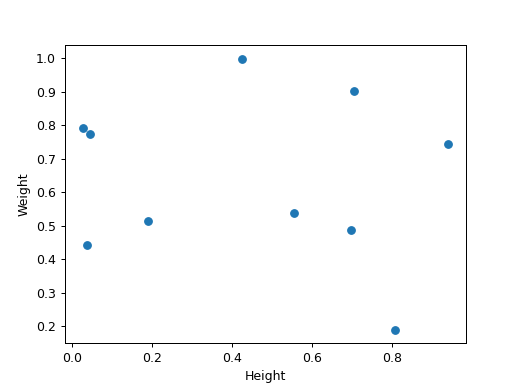

9

In [76]:
def onpick(event):
    print(dir(event))
    origin = df.iloc[event.ind[0]['origin']]
    plt.gca().set_title('Selected item came from {}'.format(origin))



plt.figure()
plt.scatter(df['height'], df['weight'], picker = 5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')
plt.gcf().canvas.mpl_connect('pick_event', onpick)


9